In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

- this is self generated data, so dont go into the y equation

In [3]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y
df.sample(3)

,X,y
76,0.271270,0.186762
83,-0.436442,0.604272
80,0.363103,0.488821


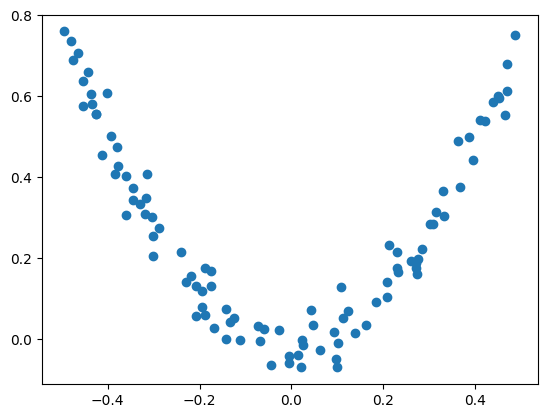

In [4]:
plt.scatter(df['X'],df['y'])

In [5]:
df['pred_1'] = df['y'].mean()
df.sample(2)

,X,y,pred_1
17,0.024756,-0.014544,0.265458
74,0.206857,0.140895,0.265458


In [6]:
df['res_1'] = df['y'] - df['pred_1'] 
df.sample(3)

,X,y,pred_1,res_1
21,-0.360506,0.402947,0.265458,0.137488
14,-0.318175,0.308560,0.265458,0.043102
47,0.020068,-0.068884,0.265458,-0.334343


- now just to get a idea, see how our model has predicted

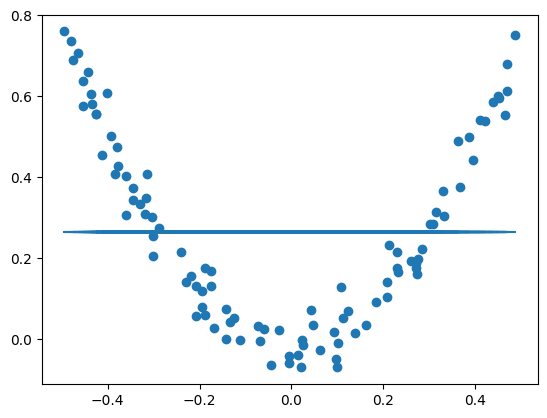

In [7]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'], df['pred_1'])

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr1 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr1.fit(df['X'].values.reshape(100,1),df['res_1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

- max_leaf_nodes=8 cause unlike adaboost where max_depth=1, here it goes deep
- so by convention 8-32 is a good range

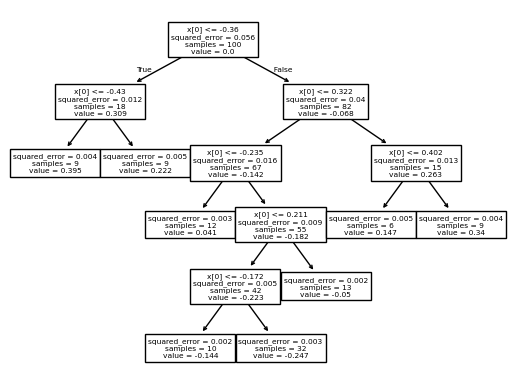

In [9]:
plot_tree(dtr1);

In [10]:
X_test = np.linspace(-0.5,0.5,500)
y_pred = df['y'].mean() + dtr1.predict(X_test.reshape(500,1))

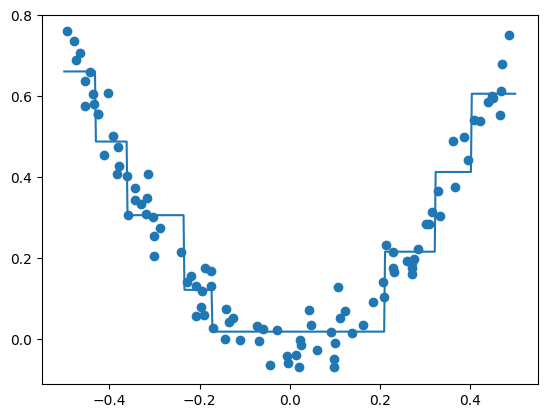

In [11]:
plt.scatter(df['X'],df['y'])
plt.plot(X_test, y_pred)

In [12]:
df['pred2'] = 0.265458 + dtr1.predict(df['X'].values.reshape(100,1))
df.head(3)

,X,y,pred_1,res_1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784


In [13]:
df['res_2'] = df['y'] - df['pred2']
df.sample(2)

,X,y,pred_1,res_1,pred2,res_2
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
81,0.123298,0.069299,0.265458,-0.196159,0.018319,0.050980


In [14]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr2.fit(df['X'].values.reshape(100,1),df['res_2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [dtr1,dtr2])

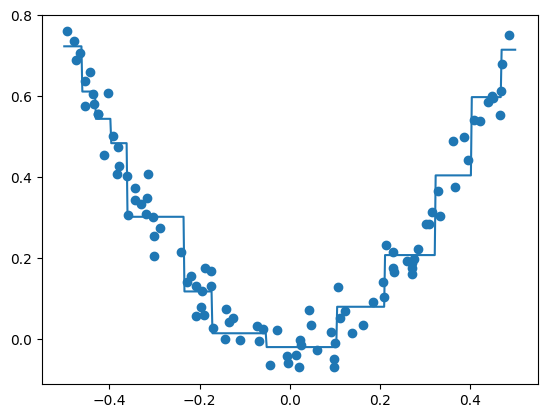

In [16]:
plt.scatter(df['X'],df['y'])
plt.plot(X_test, y_pred)

In [17]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


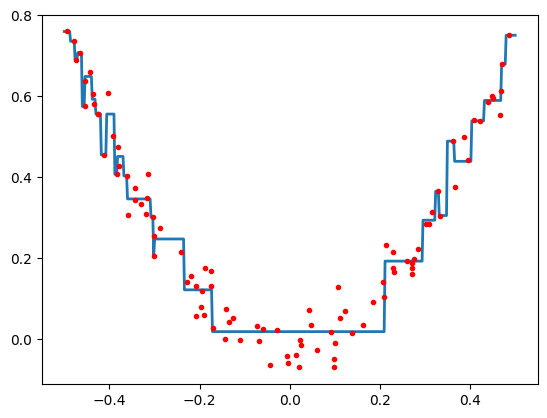

4


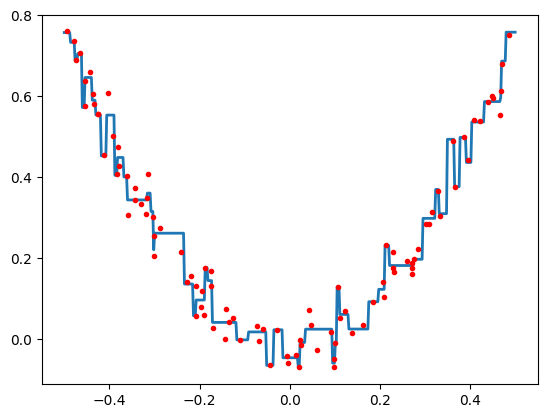

3


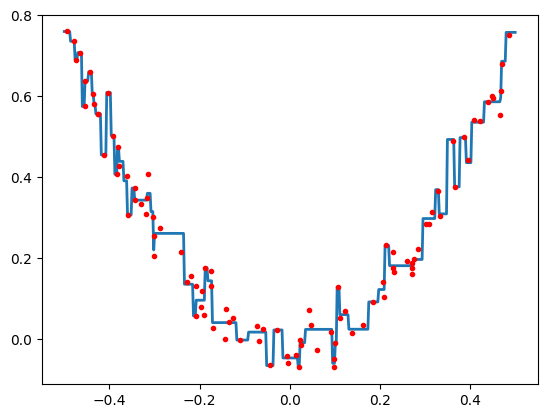

2


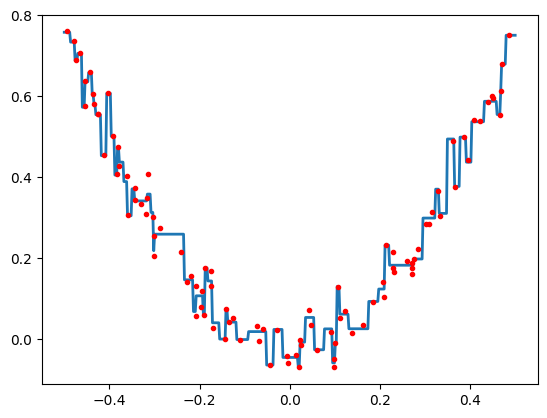

1


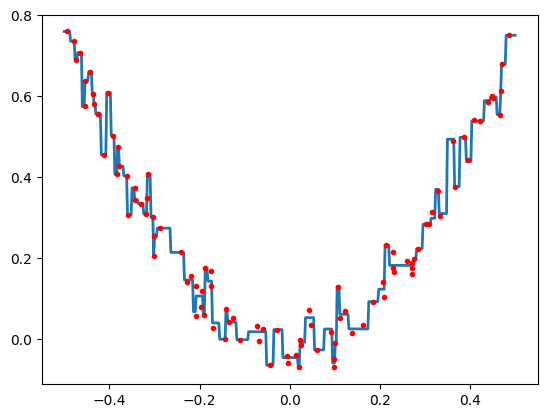

In [18]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)